<a href="https://colab.research.google.com/github/FranziskoB/Regressao_logistica_e_binaria/blob/main/04__Regressao_Logistica_multinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# REGRESSÃO LOGÍSTICA MULTINOMIAL    


Exemplo:Construção de um modelo que possa predizer se o estudante cheragá a tempo para as aulas ou se perderá a primeira ou a segunda aula. 

##Importando as bibliotecas

In [1]:
import pandas as pd # manipulação de dado em formato de dataframe
import seaborn as sns # biblioteca de visualização de informações estatísticas
import matplotlib.pyplot as plt # biblioteca de visualização de dados
import statsmodels.api as sm # biblioteca de modelagem estatística
import numpy as np # biblioteca para operações matemáticas multidimensionais
from scipy import stats
from statsmodels.iolib.summary2 import summary_col
import plotly.graph_objs as go
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')

## Importando os dados

In [2]:
df_atrasado_multinomial = pd.read_csv('https://raw.githubusercontent.com/FranziskoB/Regressao_logistica_e_binaria/main/dados/AtrasadoMultinomial.csv',delimiter=',')
df_atrasado_multinomial.head(5)

,estudante,atrasado,dist,sem
0,Gabriela,chegou atrasado à segunda aula,20.500000,15
1,Patrícia,chegou atrasado à segunda aula,21.299999,18
2,Gustavo,chegou atrasado à segunda aula,21.400000,16
3,Letícia,chegou atrasado à segunda aula,31.500000,15
4,Luiz Ovídio,chegou atrasado à segunda aula,17.500000,16


In [3]:
df_atrasado_multinomial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   estudante  100 non-null    object 
 1   atrasado   100 non-null    object 
 2   dist       100 non-null    float64
 3   sem        100 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ KB


Tabela de frequências absolutas da variável 'atrasado' com labels

In [4]:
df_atrasado_multinomial['atrasado'].value_counts(sort=False)

chegou atrasado à segunda aula     35
chegou atrasado à primeira aula    16
nao chegou atrasado                49
Name: atrasado, dtype: int64

Criando uma variável 'atrasado2' a partir da variável 'atrasado',
com labels iguais a 0, 1 e 2 e com tipo 'int' (poderia também ser do tipo
'float'), a fim de que seja possível estimar o modelo por meio
da função 'MNLogit'

In [5]:
dic={'chegou atrasado à segunda aula':2,'chegou atrasado à primeira aula':1,'nao chegou atrasado':0}
df_atrasado_multinomial['atrasado2']=df_atrasado_multinomial['atrasado'].map(dic)
df_atrasado_multinomial.head(5)

,estudante,atrasado,dist,sem,atrasado2
0,Gabriela,chegou atrasado à segunda aula,20.500000,15,2
1,Patrícia,chegou atrasado à segunda aula,21.299999,18,2
2,Gustavo,chegou atrasado à segunda aula,21.400000,16,2
3,Letícia,chegou atrasado à segunda aula,31.500000,15,2
4,Luiz Ovídio,chegou atrasado à segunda aula,17.500000,16,2


In [6]:
df_atrasado_multinomial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   estudante  100 non-null    object 
 1   atrasado   100 non-null    object 
 2   dist       100 non-null    float64
 3   sem        100 non-null    int64  
 4   atrasado2  100 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ KB


In [7]:
df_atrasado_multinomial

,estudante,atrasado,dist,sem,atrasado2
0,Gabriela,chegou atrasado à segunda aula,20.500000,15,2
1,Patrícia,chegou atrasado à segunda aula,21.299999,18,2
2,Gustavo,chegou atrasado à segunda aula,21.400000,16,2
3,Letícia,chegou atrasado à segunda aula,31.500000,15,2
4,Luiz Ovídio,chegou atrasado à segunda aula,17.500000,16,2
...,...,...,...,...,...
95,Sheila,nao chegou atrasado,24.000000,10,0
96,Pedro,chegou atrasado à primeira aula,15.000000,15,1
97,Horácio,chegou atrasado à primeira aula,14.400000,15,1
98,Leandro,chegou atrasado à segunda aula,22.200001,18,2


##Estimação do modelo logístico multinomial

In [8]:
from statsmodels.discrete.discrete_model import MNLogit

In [9]:
x = df_atrasado_multinomial.drop(columns=['estudante','atrasado','atrasado2'])
y = df_atrasado_multinomial['atrasado2']

Esse pacote precisa que a constante seja definida pelo usuário

In [10]:
X = sm.add_constant(x)

Estimação do modelo - função 'MNLogit' do pacote
'statsmodels.discrete.discrete_model'

In [11]:
modelo_atrasado = MNLogit(endog=y, exog=X).fit()

Optimization terminated successfully.
         Current function value: 0.245118
         Iterations 10


Parâmetros do modelo

In [12]:
modelo_atrasado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:              atrasado2   No. Observations:                  100
Model:                        MNLogit   Df Residuals:                       94
Method:                           MLE   Df Model:                            4
Date:                Sat, 01 Apr 2023   Pseudo R-squ.:                  0.7574
Time:                        20:41:54   Log-Likelihood:                -24.512
converged:                       True   LL-Null:                       -101.02
Covariance Type:            nonrobust   LLR p-value:                 4.598e-32
===============================================================================
atrasado2=1       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -33.1352     12.183     -2.720      0.007     -57.014      -9.256
dist            0.5588      0.243      2.297      0.022       0.082       1.036
sem             1.6699      0.577      2.895      0.004       0.539       2.801
-------------------------------------------------------------------------------
atrasado2=2       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -62.2922     14.675     -4.245      0.000     -91.055     -33.530
dist            1.0784      0.302      3.566      0.000       0.486       1.671
sem             2.8949      0.686      4.220      0.000       1.550       4.239
===============================================================================
"""

 Vamos definir uma função 'Qui2' para se extrair a estatística geral
 do modelo

In [13]:
def Qui2(modelo_multinomial):
    maximo = modelo_multinomial.llf
    minimo = modelo_multinomial.llnull
    qui2 = -2*(minimo - maximo)
    pvalue = stats.distributions.chi2.sf(qui2,1)
    df = pd.DataFrame({'Qui quadrado':[qui2],
                       'pvalue':[pvalue]})
    return df

 Estatística geral do 'modelo_atrasado'

In [14]:
Qui2(modelo_atrasado)

,Qui quadrado,pvalue
0,153.014842,3.802150e-35


##Fazendo predições para o 'modelo_atrasado'

Exemplo: qual a probabilidade média de atraso para cada categoria da
variável dependente, se o indivíduo tiver que percorrer 22km e passar
por 12 semáforos?
No nosso exemplo, tempos que:
*   0: não chegou atrasado
*   1: chegou atrasado primeira aula
*   2: chegou atrasado segunda aula


In [15]:
resultado = modelo_atrasado.predict(pd.DataFrame({'const':[1],
                                                   'dist':[22],
                                                   'sem':[12]})).round(4)

resultado


,0,1,2
0,0.6802,0.305,0.0148


Ou seja 68% de chegar a tempo para a primeira aula, 30% de chances de atrasado na primeira aula e menos de 2% de chegar atrasado na segunda aula. 

Adicionando as probabilidades de ocorrência de cada uma das
categorias de Y definidas pela modelagem, bem como a respectiva
classificação, ao dataframe original

Probabilidades de ocorrência das três categoriais
Definição do array 'phats':

In [16]:
phats = modelo_atrasado.predict()

Transformação do array 'phats' para o dataframe 'phats':

In [17]:
phats = pd.DataFrame(phats)
phats.head(5)

,0,1,2
0,1.801024e-02,0.523388,0.458602
1,2.751301e-06,0.018737,0.981260
2,6.796190e-04,0.173472,0.825849
3,2.759476e-07,0.003748,0.996252
4,2.083782e-02,0.601588,0.377574


Concatenando o dataframe original com o dataframe 'phats':

In [18]:
df_atrasado_multinomial = pd.concat([df_atrasado_multinomial, phats], axis=1)
df_atrasado_multinomial.head(5)

,estudante,atrasado,dist,sem,atrasado2,0,1,2
0,Gabriela,chegou atrasado à segunda aula,20.500000,15,2,1.801024e-02,0.523388,0.458602
1,Patrícia,chegou atrasado à segunda aula,21.299999,18,2,2.751301e-06,0.018737,0.981260
2,Gustavo,chegou atrasado à segunda aula,21.400000,16,2,6.796190e-04,0.173472,0.825849
3,Letícia,chegou atrasado à segunda aula,31.500000,15,2,2.759476e-07,0.003748,0.996252
4,Luiz Ovídio,chegou atrasado à segunda aula,17.500000,16,2,2.083782e-02,0.601588,0.377574


 Analisando o resultado de acordo com a categoria de resposta:

In [19]:
classificacao = phats.idxmax(axis=1)
classificacao

0     1
1     2
2     2
3     2
4     1
     ..
95    0
96    1
97    0
98    2
99    0
Length: 100, dtype: int64

Adicionando a categoria de resposta 'classificacao' ao dataframe original,
por meio da criação da variável 'predicao'

In [20]:
df_atrasado_multinomial['predicao'] = classificacao
df_atrasado_multinomial

,estudante,atrasado,dist,sem,atrasado2,0,1,2,predicao
0,Gabriela,chegou atrasado à segunda aula,20.500000,15,2,1.801024e-02,0.523388,4.586018e-01,1
1,Patrícia,chegou atrasado à segunda aula,21.299999,18,2,2.751301e-06,0.018737,9.812605e-01,2
2,Gustavo,chegou atrasado à segunda aula,21.400000,16,2,6.796190e-04,0.173472,8.258489e-01,2
3,Letícia,chegou atrasado à segunda aula,31.500000,15,2,2.759476e-07,0.003748,9.962518e-01,2
4,Luiz Ovídio,chegou atrasado à segunda aula,17.500000,16,2,2.083782e-02,0.601588,3.775739e-01,1
...,...,...,...,...,...,...,...,...,...
95,Sheila,nao chegou atrasado,24.000000,10,0,9.531361e-01,0.046317,5.471598e-04,0
96,Pedro,chegou atrasado à primeira aula,15.000000,15,1,4.146183e-01,0.557343,2.803830e-02,1
97,Horácio,chegou atrasado à primeira aula,14.400000,15,1,5.008256e-01,0.481441,1.773339e-02,0
98,Leandro,chegou atrasado à segunda aula,22.200001,18,2,1.049763e-06,0.011822,9.881774e-01,2


Criando a variável 'predicao_label' a partir da variável 'predicao',
respeitando os seguintes rótulos:
*  0: não chegou atrasado
*  1: chegou atrasado primeira aula
*  2: chegou atrasado segunda aula


In [21]:
df_atrasado_multinomial.loc[df_atrasado_multinomial['predicao']==0,
                            'predicao_label'] ='não chegou atrasado'
df_atrasado_multinomial.loc[df_atrasado_multinomial['predicao']==1,
                            'predicao_label'] ='chegou atrasado primeira aula'
df_atrasado_multinomial.loc[df_atrasado_multinomial['predicao']==2,
                            'predicao_label'] ='chegou atrasado segunda aula'

df_atrasado_multinomial

,estudante,atrasado,dist,sem,atrasado2,0,1,2,predicao,predicao_label
0,Gabriela,chegou atrasado à segunda aula,20.500000,15,2,1.801024e-02,0.523388,4.586018e-01,1,chegou atrasado primeira aula
1,Patrícia,chegou atrasado à segunda aula,21.299999,18,2,2.751301e-06,0.018737,9.812605e-01,2,chegou atrasado segunda aula
2,Gustavo,chegou atrasado à segunda aula,21.400000,16,2,6.796190e-04,0.173472,8.258489e-01,2,chegou atrasado segunda aula
3,Letícia,chegou atrasado à segunda aula,31.500000,15,2,2.759476e-07,0.003748,9.962518e-01,2,chegou atrasado segunda aula
4,Luiz Ovídio,chegou atrasado à segunda aula,17.500000,16,2,2.083782e-02,0.601588,3.775739e-01,1,chegou atrasado primeira aula
...,...,...,...,...,...,...,...,...,...,...
95,Sheila,nao chegou atrasado,24.000000,10,0,9.531361e-01,0.046317,5.471598e-04,0,não chegou atrasado
96,Pedro,chegou atrasado à primeira aula,15.000000,15,1,4.146183e-01,0.557343,2.803830e-02,1,chegou atrasado primeira aula
97,Horácio,chegou atrasado à primeira aula,14.400000,15,1,5.008256e-01,0.481441,1.773339e-02,0,não chegou atrasado
98,Leandro,chegou atrasado à segunda aula,22.200001,18,2,1.049763e-06,0.011822,9.881774e-01,2,chegou atrasado segunda aula


##Métricas do modelo

### Eficiência global do modelo

Criando uma tabela para comparar as ocorrências reais com as predições

In [22]:
table = pd.pivot_table(df_atrasado_multinomial,
                       index=['predicao_label'],
                       columns=['atrasado'],
                       aggfunc='size')

In [23]:
table = table.fillna(0)#Substituindo 'nan' por zero
table = table.to_numpy()#Transformando o dataframe 'table' para 'array', para que seja possível estabelecer o atributo 'diagonal'
acuracia = table.diagonal().sum()/table.sum()#Eficiência global do modelo
acuracia

0.89

 ### Plotagens das probabilidades

Plotagem das smooth probability lines para a variável 'dist'

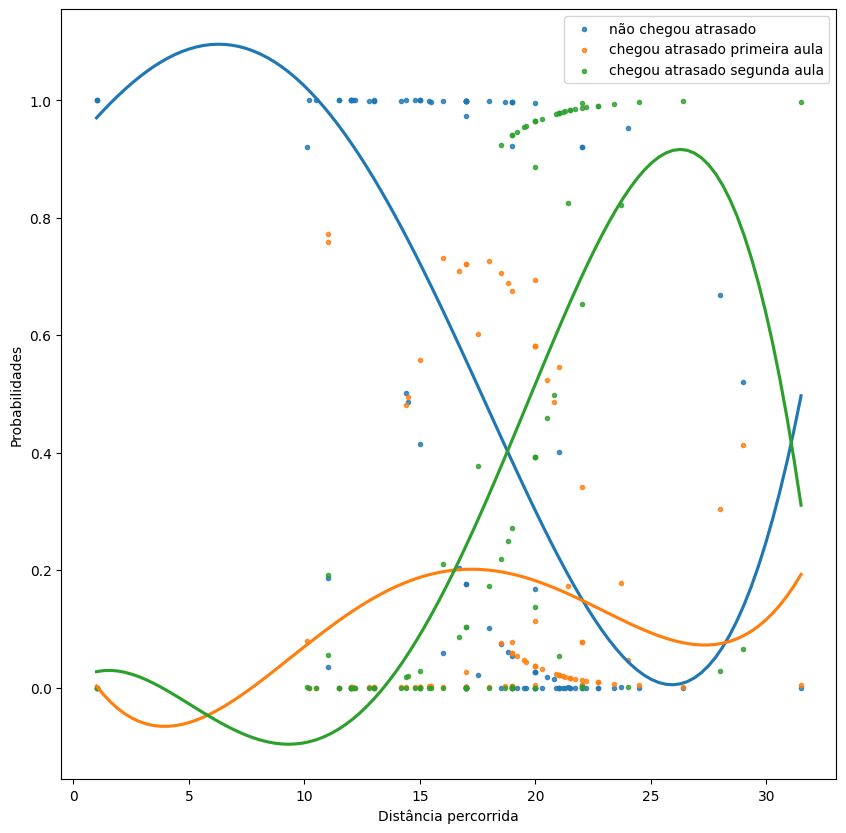

In [24]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.regplot(df_atrasado_multinomial,x=df_atrasado_multinomial['dist'],
            y=df_atrasado_multinomial[0],
            ci=False, ax=ax,
            label='não chegou atrasado', order=4, marker=".")
sns.regplot(df_atrasado_multinomial,x=df_atrasado_multinomial['dist'],
            y=df_atrasado_multinomial[1],
            ci=False, ax=ax,
            label='chegou atrasado primeira aula', order=4, marker=".")
sns.regplot(df_atrasado_multinomial,x=df_atrasado_multinomial['dist'],
            y=df_atrasado_multinomial[2],
            ci=False, ax=ax,
            label='chegou atrasado segunda aula', order=4, marker=".")
ax.set(ylabel='Probabilidades', xlabel='Distância percorrida')
ax.legend()
plt.show()



Plotagem das smooth probability lines para a variável 'sem'

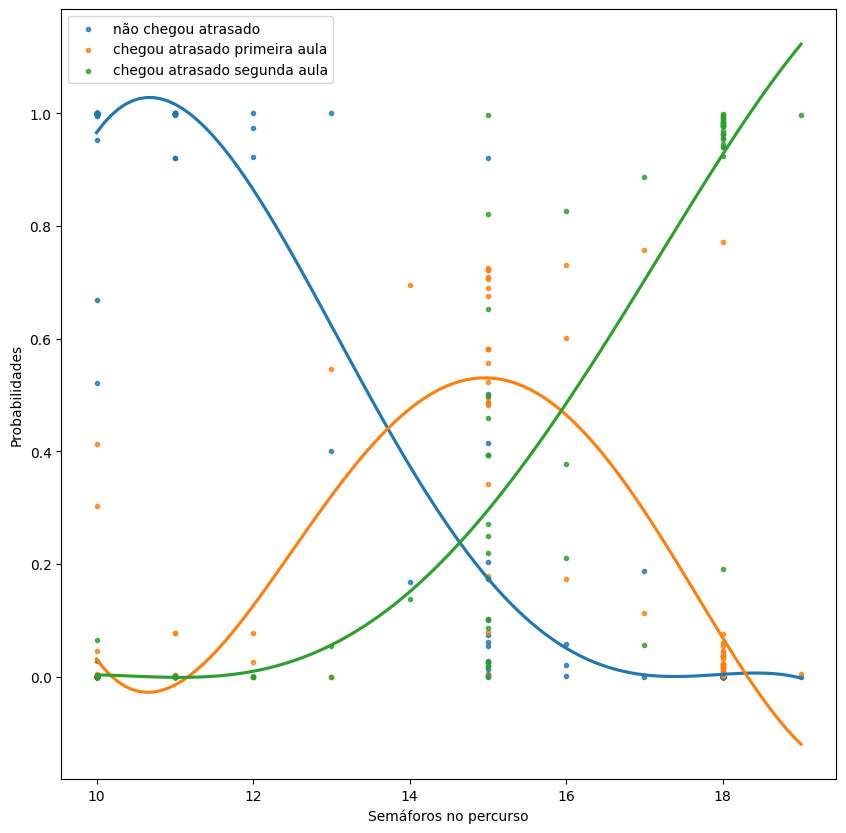

In [25]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.regplot(df_atrasado_multinomial,x=df_atrasado_multinomial['sem'],
            y=df_atrasado_multinomial[0],
            ci=False, ax=ax,
            label='não chegou atrasado', order=4, marker=".")
sns.regplot(df_atrasado_multinomial,x=df_atrasado_multinomial['sem'],
            y=df_atrasado_multinomial[1],
            ci=False, ax=ax,
            label='chegou atrasado primeira aula', order=4, marker=".")
sns.regplot(df_atrasado_multinomial,x=df_atrasado_multinomial['sem'],
            y=df_atrasado_multinomial[2],
            ci=False, ax=ax,
            label='chegou atrasado segunda aula', order=4, marker=".")
ax.set(ylabel='Probabilidades', xlabel='Semáforos no percurso')
ax.legend()
plt.show()


Plotagem tridimensional para cada probabilidade de ocorrência de cada
categoria da variável dependente

Probabilidades de não chegar atrasado (função 'go' do pacote 'plotly')

In [26]:
import plotly.io as pio
pio.renderers.default = 'colab'

trace = go.Mesh3d(
    x=df_atrasado_multinomial['dist'], 
    y=df_atrasado_multinomial['sem'],
    z=df_atrasado_multinomial[0],
    opacity=1, intensity=df_atrasado_multinomial[0], colorscale="Viridis")

layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0},
    width=800,
    height=800
)

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)

plot_figure.update_layout(scene = dict(
                        xaxis_title='dist',
                        yaxis_title='sem',
                        zaxis_title='não chegou atrasado'))

plot_figure.show()

In[ ]: Plotagem tridimensional para cada probabilidade de ocorrência de cada
categoria da variável dependente
Probabilidades de chegar atrasado à primeira aula (função 'go' do pacote'plotly')

In [27]:
pio.renderers.default = 'colab'

trace = go.Mesh3d(
    x=df_atrasado_multinomial['dist'], 
    y=df_atrasado_multinomial['sem'],
    z=df_atrasado_multinomial[1],
    opacity=1, intensity=df_atrasado_multinomial[1], colorscale="Viridis")

layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0},
    width=800,
    height=800
)

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)

plot_figure.update_layout(scene = dict(
                        xaxis_title='dist',
                        yaxis_title='sem',
                        zaxis_title='chegou atrasado à primeira aula'))

plot_figure.show()

 Plotagem tridimensional para cada probabilidade de ocorrência de cada
categoria da variável dependente

Probabilidades de chegar atrasado à segunda aula (função 'go' do pacote
'plotly')

In [28]:
pio.renderers.default = 'colab'

trace = go.Mesh3d(
    x=df_atrasado_multinomial['dist'], 
    y=df_atrasado_multinomial['sem'],
    z=df_atrasado_multinomial[2],
    opacity=1, intensity=df_atrasado_multinomial[2], colorscale="Viridis")

layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0},
    width=800,
    height=800
)

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)

plot_figure.update_layout(scene = dict(
                        xaxis_title='dist',
                        yaxis_title='sem',
                        zaxis_title='chegou atrasado à segunda aula'))

plot_figure.show()

Visualização das sigmóides tridimensionais em um único gráfico

In [29]:
trace = go.Mesh3d(
    x=df_atrasado_multinomial['dist'], 
    y=df_atrasado_multinomial['sem'],
    z=df_atrasado_multinomial[0],
    opacity=1)

layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0},
    width=800,
    height=800
)

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)

trace_1 = go.Mesh3d(
            x=df_atrasado_multinomial['dist'], 
            y=df_atrasado_multinomial['sem'],
            z=df_atrasado_multinomial[1],
            opacity=1)

plot_figure.add_trace(trace_1)

trace_2 = go.Mesh3d(
            x=df_atrasado_multinomial['dist'], 
            y=df_atrasado_multinomial['sem'],
            z=df_atrasado_multinomial[2],
            opacity=1)


plot_figure.add_trace(trace_2)

plot_figure.update_layout(scene = dict(
                        xaxis_title='dist',
                        yaxis_title='sem',
                        zaxis_title='probabilidades'))

plot_figure.show()